Точность: 0.7333333333333333
K = 100
Метрика: euclidean
P = 20


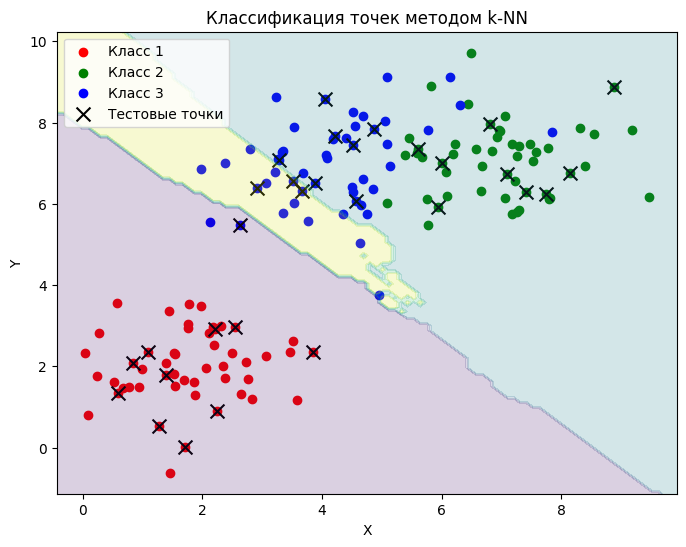

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

k = 100
metric = "euclidean"
p = 20

# Генерируем данные для трех классов
np.random.seed(42) # Фиксируем seed для генератора случайных чисел, чтобы результаты были воспроизводимы. 42 - простое число
class1_x = np.random.normal(loc=2, scale=1, size=50) # Генерируем 50 значений для координаты x первого класса, распределенных нормально со средним 2 и стандартным отклонением 1
class1_y = np.random.normal(loc=2, scale=1, size=50) # Генерируем 50 значений для координаты y первого класса, распределенных нормально со средним 2 и стандартным отклонением 1
class2_x = np.random.normal(loc=7, scale=1, size=50) # Аналогично для второго класса, среднее 7
class2_y = np.random.normal(loc=7, scale=1, size=50) # Аналогично для второго класса, среднее 7
class3_x = np.random.normal(loc=4, scale=1, size=50) # Аналогично для третьего класса, среднее 4
class3_y = np.random.normal(loc=7, scale=1, size=50) # Аналогично для третьего класса, среднее 7

# Объединяем данные и метки классов
X = np.column_stack((np.concatenate((class1_x, class2_x, class3_x)), # объединяем координаты x всех классов в один массив
                     np.concatenate((class1_y, class2_y, class3_y)))) # объединяем координаты y всех классов в один массив
# X теперь содержит все точки данных, каждая строка - это точка (x, y)
y = np.concatenate((np.zeros(50), np.ones(50), 2 * np.ones(50))) # создаем массив меток классов: 0 для первого класса, 1 для второго, 2 для третьего

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% данных - тестовые, 80% - тренировочные. random_state=42 гарантирует одинаковое разделение при каждом запуске

# Обучаем модель k-NN (k=3)
knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p) # создаем объект классификатора k-NN с k=3 (3 ближайших соседа)
knn.fit(X_train, y_train) # обучаем модель на тренировочных данных

# Предсказываем классы для тестового набора
predictions = knn.predict(X_test) # предсказываем классы для тестовых данных

# Оцениваем точность
accuracy = np.mean(predictions == y_test) # считаем долю правильных предсказаний
print(f"Точность: {accuracy}")
print(f"K = {k}")
print(f"Метрика: {metric}")
print(f"P = {p}")

# Визуализация
plt.figure(figsize=(8, 6)) # создаем график размером 8x6 дюймов
plt.scatter(class1_x, class1_y, label='Класс 1', color='red') # отображаем точки первого класса красным
plt.scatter(class2_x, class2_y, label='Класс 2', color='green') # отображаем точки второго класса зеленым
plt.scatter(class3_x, class3_y, label='Класс 3', color='blue') # отображаем точки третьего класса синим
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', color='black', label='Тестовые точки', s=100) # отображаем тестовые точки черными крестиками

# Рисуем границы принятия решений (упрощенное представление)
x_min, x_max = plt.xlim() # получаем границы области по x
y_min, y_max = plt.ylim() # получаем границы области по y
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)) # создаем сетку точек для построения границ
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # предсказываем классы для каждой точки сетки
Z = Z.reshape(xx.shape) # преобразуем предсказания в форму сетки
plt.contourf(xx, yy, Z, alpha=0.2) # рисуем границы принятия решений с прозрачностью 0.2

plt.xlabel('X') # подпись оси x
plt.ylabel('Y') # подпись оси y
plt.title('Классификация точек методом k-NN') # заголовок графика
plt.legend() # отображаем легенду
plt.show() # показываем график


# Протестируем работу метода kNN на наборе данных MNIST

<ipython-input-59-5aed79ea505c>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = first_digit[0]


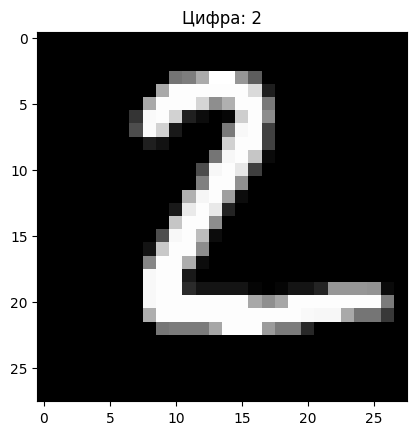

In [59]:
import cv2
import numpy as np
import pandas as pd

# Загрузка данных из mnist.csv
df = pd.read_csv("sample_data/mnist_test.csv")
# Извлечение первой строки данных (первая цифра)
first_digit = df.iloc[0]
# Извлечение метки (текстового значения цифры)
label = first_digit[0]
# Извлечение пикселей изображения
pixels = first_digit[1:].values
# Преобразование пикселей в двумерный массив 28x28
image = pixels.reshape(28, 28)
# Отображение изображения с помощью matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Цифра: {label}")
plt.show()


In [ ]:

# Разделение данных на признаки (X) и метки (y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
# Преобразование признаков в формат, подходящий для OpenCV
X = X.astype(np.float32)
# Создание и обучение kNN классификатора
knn = cv2.ml_KNearest.create()
knn.train(X, cv2.ml.ROW_SAMPLE, y.astype(np.float32))
# Пример использования: классификация первого изображения из тестового набора
test_image = X[0].reshape(1, -1)
ret, result, neighbours, dist = knn.findNearest(test_image, k=5) # k=5 - 5 ближайших соседей
print(f"Предсказанная цифра: {result[0][0]}")
print(f"Реальная цифра: {y[0]}")


Предсказанная цифра: 2.0
Реальная цифра: 2


In [ ]:
# Оценка точности на тестовом наборе
# Загрузка тестового набора данных
df_test = pd.read_csv("sample_data/mnist_test.csv")
ks = [1,3,5,7,10,20]
#k = 3
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test = X_test.astype(np.float32)
# Предсказание на тестовой выборке
for k in ks:
  ret, results, neighbours, dist = knn.findNearest(X_test, k=k)
  # Расчет точности
  accuracy = np.sum(results.flatten() == y_test) / len(y_test)
  print(f"K = {k}.Точность на тестовом наборе: {accuracy * 100:.2f}%")


K = 1.Точность на тестовом наборе: 100.00%
K = 3.Точность на тестовом наборе: 97.73%
K = 5.Точность на тестовом наборе: 97.06%
K = 7.Точность на тестовом наборе: 96.31%
K = 10.Точность на тестовом наборе: 95.71%
K = 20.Точность на тестовом наборе: 94.29%


## Задание 2


In [62]:
# Оценка точности на тестовом наборе
# Загрузка тестового набора данных
df_test = pd.read_csv("sample_data/mnist_test.csv")
ks = [1,3,5,7,10,20]
#k = 3
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test = X_test.astype(np.float32)
X_train = X_test / 255.0

# Предсказание на тестовой выборке
for k in ks:
  ret, results, neighbours, dist = knn.findNearest(X_test, k=k)
  # Расчет точности
  accuracy = np.sum(results.flatten() == y_test) / len(y_test)
  print(f"K = {k}.Точность на тестовом наборе: {accuracy * 100:.2f}%")

K = 1.Точность на тестовом наборе: 100.00%
K = 3.Точность на тестовом наборе: 97.73%
K = 5.Точность на тестовом наборе: 97.06%
K = 7.Точность на тестовом наборе: 96.31%
K = 10.Точность на тестовом наборе: 95.71%
K = 20.Точность на тестовом наборе: 94.29%


### Задание 3

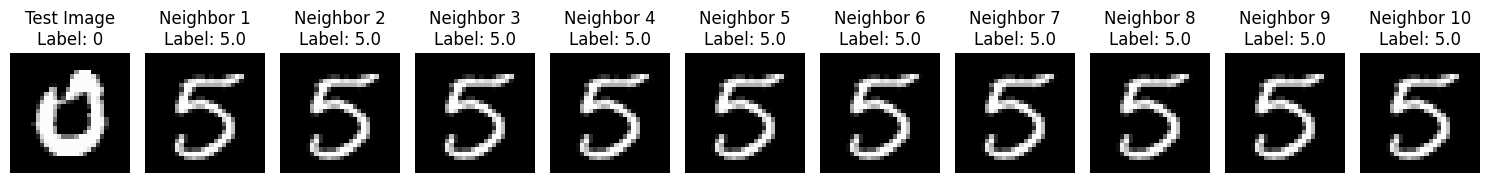


Анализ для тестового изображения класса 0:
Сосед 1: класс 5.0, расстояние 25.56
Сосед 2: класс 5.0, расстояние 34.16
Сосед 3: класс 5.0, расстояние 34.49
Сосед 4: класс 5.0, расстояние 35.33
Сосед 5: класс 5.0, расстояние 35.59
Сосед 6: класс 5.0, расстояние 36.95
Сосед 7: класс 5.0, расстояние 37.53
Сосед 8: класс 5.0, расстояние 37.83
Сосед 9: класс 5.0, расстояние 38.22
Сосед 10: класс 5.0, расстояние 38.34

Совпадений с истинным классом: 0 из 10


In [95]:
# Загрузка данных
df_train = pd.read_csv("sample_data/mnist_train_small.csv")
df_test = pd.read_csv("sample_data/mnist_test.csv")

# Подготовка данных
X_train = df_train.iloc[:, 1:].values.astype(np.float32) / 255.0
y_train = df_train.iloc[:, 0].values.astype(np.float32)
X_test = df_test.iloc[:, 1:].values.astype(np.float32) / 255.0
y_test = df_test.iloc[:, 0].values

# Создание и обучение KNN
knn = cv2.ml.KNearest_create()
knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

# Выбираем случайное изображение из тестового набора
#random_idx = 42  # Фиксированный индекс
random_idx = np.random.randint(0, len(X_test))
test_image = X_test[random_idx]
true_label = y_test[random_idx]

# Находим ближайших соседей
k = 10
_, results, neighbours, dist = knn.findNearest(test_image.reshape(1, -1), k)

# Визуализация
plt.figure(figsize=(15, 3))

# Тестовое изображение
plt.subplot(1, k+1, 1)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Test Image\nLabel: {true_label}")
plt.axis('off')

# Ближайшие соседи
for i in range(k):
    neighbor_idx = neighbours[0, i]
    neighbor_img = X_train[int(neighbor_idx)].reshape(28, 28)
    neighbor_label = y_train[int(neighbor_idx)]

    plt.subplot(1, k+1, i+2)
    plt.imshow(neighbor_img, cmap='gray')
    plt.title(f"Neighbor {i+1}\nLabel: {neighbor_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Анализ
print(f"\nАнализ для тестового изображения класса {true_label}:")
for i in range(k):
    neighbor_label = y_train[int(neighbours[0, i])]
    distance = dist[0, i]
    print(f"Сосед {i+1}: класс {neighbor_label}, расстояние {distance:.2f}")

match_count = np.sum(y_train[neighbours.astype(int)].flatten() == true_label)
print(f"\nСовпадений с истинным классом: {match_count} из {k}")

# Задание для сам работы
## Задание 1

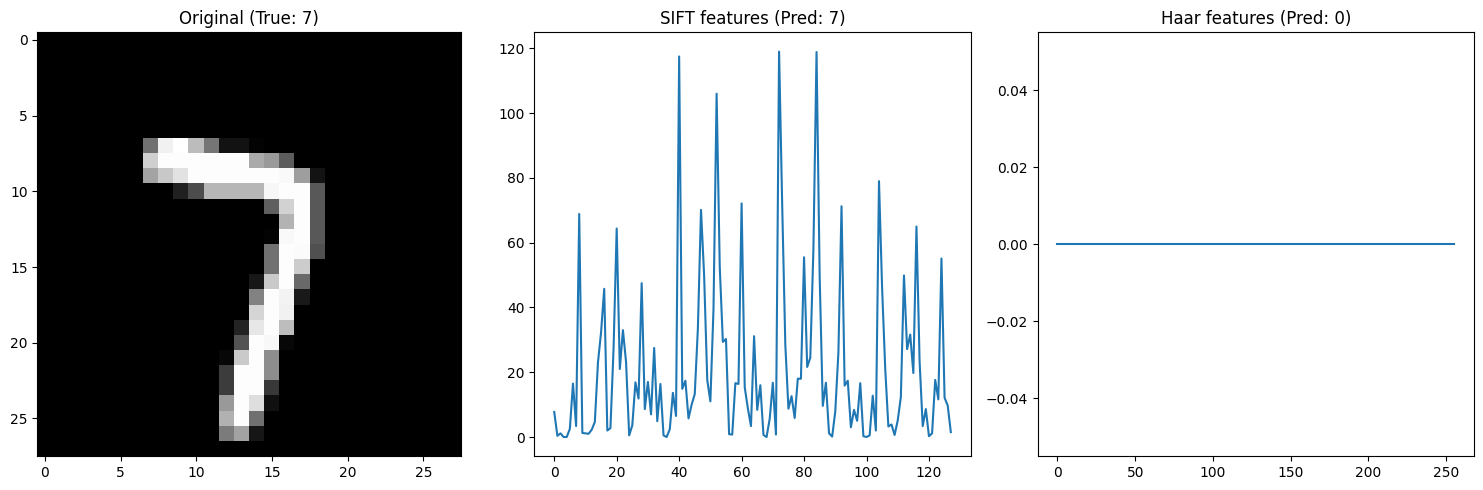


Accuracy Comparison:
Pixel-based: 0.8450
SIFT-based: 0.4750
Haar-based: 0.0900


In [77]:
import numpy as np
import pandas as pd
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка данных (меньший набор для скорости)
df_train = pd.read_csv("sample_data/mnist_train_small.csv").sample(1000)
df_test = pd.read_csv("sample_data/mnist_test.csv").sample(200)

# Подготовка данных
X_train = df_train.iloc[:, 1:].values.reshape(-1, 28, 28).astype(np.uint8)
y_train = df_train.iloc[:, 0].values
X_test = df_test.iloc[:, 1:].values.reshape(-1, 28, 28).astype(np.uint8)
y_test = df_test.iloc[:, 0].values

# 1. KNN на пикселях (базовый подход)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

knn_pixel = KNeighborsClassifier(n_neighbors=3)
knn_pixel.fit(X_train_flat, y_train)
y_pred_pixel = knn_pixel.predict(X_test_flat)
pixel_acc = accuracy_score(y_test, y_pred_pixel)


# 2. KNN на SIFT-признаках
sift = cv2.SIFT_create()

# Извлечение SIFT для тренировочных данных
train_sift_features = []
for img in X_train:
    kp, des = sift.detectAndCompute(img, None)
    if des is not None:
        train_sift_features.append(des.mean(axis=0))  # Усреднение
    else:
        train_sift_features.append(np.zeros(128))  # Заполнение нулями

X_train_sift = np.array(train_sift_features)

# Извлечение SIFT для тестовых данных
test_sift_features = []
for img in X_test:
    kp, des = sift.detectAndCompute(img, None)
    if des is not None:
        test_sift_features.append(des.mean(axis=0))
    else:
        test_sift_features.append(np.zeros(128))

X_test_sift = np.array(test_sift_features)

# Обучение и предсказание SIFT KNN
knn_sift = KNeighborsClassifier(n_neighbors=3)
knn_sift.fit(X_train_sift, y_train)
y_pred_sift = knn_sift.predict(X_test_sift)
sift_acc = accuracy_score(y_test, y_pred_sift)


# 3. KNN на признаках Хаара
haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Извлечение Хаар для тренировочных данных
train_haar_features = []
for img in X_train:
    img_resized = cv2.resize(img, (24, 24))
    faces = haar.detectMultiScale(img_resized)
    if len(faces) > 0:
        x,y,w,h = faces[0]
        face_roi = img_resized[y:y+h, x:x+w]
        hist = cv2.calcHist([face_roi], [0], None, [256], [0,256]).flatten()
    else:
        hist = np.zeros(256)
    train_haar_features.append(hist)

X_train_haar = np.array(train_haar_features)

# Извлечение Хаар для тестовых данных
test_haar_features = []
for img in X_test:
    img_resized = cv2.resize(img, (24, 24))
    faces = haar.detectMultiScale(img_resized)
    if len(faces) > 0:
        x,y,w,h = faces[0]
        face_roi = img_resized[y:y+h, x:x+w]
        hist = cv2.calcHist([face_roi], [0], None, [256], [0,256]).flatten()
    else:
        hist = np.zeros(256)
    test_haar_features.append(hist)

X_test_haar = np.array(test_haar_features)

# Обучение и предсказание Хаар KNN
knn_haar = KNeighborsClassifier(n_neighbors=3)
knn_haar.fit(X_train_haar, y_train)
y_pred_haar = knn_haar.predict(X_test_haar)
haar_acc = accuracy_score(y_test, y_pred_haar)


# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Original (True: {y_test[0]})")

plt.subplot(1, 3, 2)
plt.plot(X_test_sift[0])
plt.title(f"SIFT features (Pred: {y_pred_sift[0]})")

plt.subplot(1, 3, 3)
plt.plot(X_test_haar[0])
plt.title(f"Haar features (Pred: {y_pred_haar[0]})")

plt.tight_layout()
plt.show()

# Сравнение точности
print("\nAccuracy Comparison:")
print(f"Pixel-based: {pixel_acc:.4f}")
print(f"SIFT-based: {sift_acc:.4f}")
print(f"Haar-based: {haar_acc:.4f}")

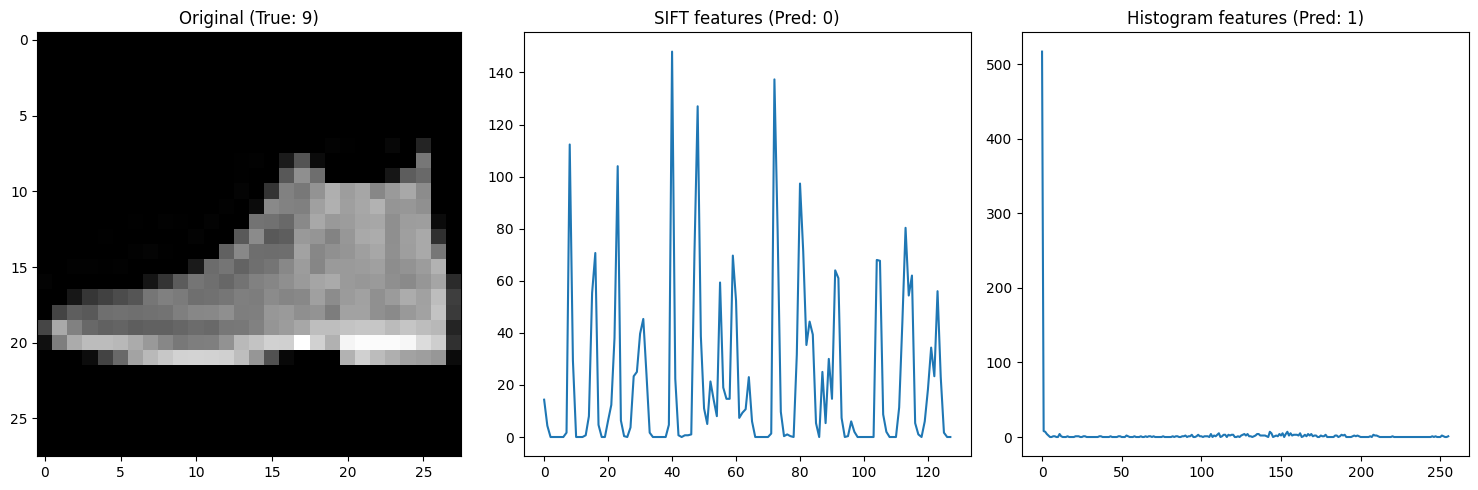


Accuracy Comparison:
Pixel-based: Accuracy = 0.7850
SIFT-based: Accuracy = 0.4150
Histogram-based: Accuracy = 0.3600


In [81]:
import numpy as np
import pandas as pd
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Загрузка данных Fashion-MNIST
from tensorflow.keras.datasets import fashion_mnist

# Загрузка данных
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

# Меньший набор для скорости
X_train, y_train = X_train_full[:1000], y_train_full[:1000]
X_test, y_test = X_test_full[:200], y_test_full[:200]

# 1. KNN на пикселях (базовый подход)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

start_time = time.time()
knn_pixel = KNeighborsClassifier(n_neighbors=3)
knn_pixel.fit(X_train_flat, y_train)
y_pred_pixel = knn_pixel.predict(X_test_flat)
pixel_acc = accuracy_score(y_test, y_pred_pixel)
pixel_time = time.time() - start_time

# 2. KNN на SIFT-признаках
sift = cv2.SIFT_create()

def extract_sift_features(images):
    features = []
    for img in images:
        kp, des = sift.detectAndCompute(img, None)
        if des is not None:
            features.append(des.mean(axis=0))  # Усреднение
        else:
            features.append(np.zeros(128))  # Заполнение нулями
    return np.array(features)

start_time = time.time()
X_train_sift = extract_sift_features(X_train)
X_test_sift = extract_sift_features(X_test)

knn_sift = KNeighborsClassifier(n_neighbors=3)
knn_sift.fit(X_train_sift, y_train)
y_pred_sift = knn_sift.predict(X_test_sift)
sift_acc = accuracy_score(y_test, y_pred_sift)
sift_time = time.time() - start_time

# 3. KNN на гистограммах интенсивности (заменяем Хаар-признаки)
def extract_intensity_histograms(images):
    histograms = []
    for img in images:
        hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
        histograms.append(hist)
    return np.array(histograms)

start_time = time.time()
X_train_hist = extract_intensity_histograms(X_train)
X_test_hist = extract_intensity_histograms(X_test)

knn_hist = KNeighborsClassifier(n_neighbors=3)
knn_hist.fit(X_train_hist, y_train)
y_pred_hist = knn_hist.predict(X_test_hist)
hist_acc = accuracy_score(y_test, y_pred_hist)
hist_time = time.time() - start_time

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Original (True: {y_test[0]})")

plt.subplot(1, 3, 2)
plt.plot(X_test_sift[0])
plt.title(f"SIFT features (Pred: {y_pred_sift[0]})")

plt.subplot(1, 3, 3)
plt.plot(X_test_hist[0])
plt.title(f"Histogram features (Pred: {y_pred_hist[0]})")

plt.tight_layout()
plt.show()

# Сравнение точности и времени
print("\nAccuracy Comparison:")
print(f"Pixel-based: Accuracy = {pixel_acc:.4f}")
print(f"SIFT-based: Accuracy = {sift_acc:.4f}")
print(f"Histogram-based: Accuracy = {hist_acc:.4f}")